In [1]:
import numpy as np
from itertools import product,combinations
import matplotlib.pyplot as plt
from math import log
import scipy.stats

In [2]:
def design_matrix(n):
    D=[]
    for i in product([-1,+1],repeat=n):
        D.append(list(i))
    return D

In [3]:
def effect_matrix(d):
    x2=np.flip(d,1)
    X=[]
    index=[]
    for i in range(len(x2)):
        if np.product(x2[i][:len(x2[i])-1])==x2[i][-1]:
            X.append(x2[i])
            index.append(i)
    dm=np.array(X)
    (r,c)=np.shape(dm)
    x=''
    for i in range(c):
        x+=str(i)
    labels=[]
    for i in range(c-1):
        for j in combinations(x,i+2):
            labels.append(list(map(int,j)))
    for i in range(len(labels)):
        I=np.full(r,1)
        for j in labels[i]:
            I=I*dm[:,j]
        dm=np.insert(dm,np.shape(dm)[1],I,1)
    return (dm,labels,index)

In [4]:
def effects(e,Res,index):
    R=[Res[0][i] for i in index]
    avg=np.mean(R,axis=0)
    e=e.astype('float64')
    for i in range(len(e)):
        for j in range(len(e[i])):
            e[i][j]=e[i][j]*R[i]
    return e

In [5]:
def eff_det(E,labels,Res,index):
    R=[Res[0][i] for i in index]
    AVG=np.mean(R)
    e=[("AVG",AVG)]
    labels2=[]
    for i in labels[-1]:
        labels2.append([i])
    labels2.extend(labels)
    (r,c)=np.shape(E)
    for i in range(c):
        e.append((l2str(labels2[i]),np.sum(E[:,i])/(len(E)/2)))
    if len(R)==2:
        N=2*len(R[0])
        s2=np.sum((R[0]-R[1])**2)/(2*len(R[0]))
        V_eff=(4/N)*s2
        sd_eff=np.sqrt(V_eff)
        V_ave=(s2/N)
        sd_ave=np.sqrt(V_ave)
        return (e,sd_eff,sd_ave)
    else:
        return(e)

In [6]:
def significants(eff_ints,sd_ave,sd_eff,DOF,a):
    t_crit=scipy.stats.t.ppf(q=1-a,df=DOF)
    sig=[]
    if eff_ints[0][1]/sd_ave>=t_crit:
        sig.append(eff_ints[0])
    for i in range(1,len(eff_ints)):
        if eff_ints[i][1]/sd_eff>=t_crit:
            sig.append(eff_ints[i])
    return sig

In [7]:
def seq_eval(sig,seq=''): #,extremes):
    if seq:
        val=sig[0][1]
        for i in range(len(seq)):
            if seq[i]=="+":
                val+=(sig[i+1][1]/2)*1 #extremes[i][1]
            elif seq[i]=="-":
                val+=(sig[i+1][1]/2)*(-1) #extremes[i][0]
    return val 

In [8]:
def model_eval(sig,seq_list): #,extremes):
    L=[]
    for seq in seq_list:
        L.append((seq,seq_eval(sig,seq)))
    return L  

In [9]:
#all main effects considered
def model(dm,eff_ints,order=1): #,extremes):
    n=log(len(dm),2)
    est=[]
    for i in range(len(dm)):
        val=eff_ints[0][1]
        for j in range(len(dm[i])):
            val+=((eff_ints[j+1][1])/2)*dm[i][j] #extremes[j][1/0]
        est.append(val)
    return (est)

In [10]:
def resi(A,R):
    avg=np.mean(R,axis=0)
    res=[]
    for i in range(len(avg)):
        res.append(avg[i]-A[i])
    return res

In [11]:
def prob_plot(A,label,title=''):
    m=len(A)
    Pi=[(100/m)*(i-0.5) for i in range(1,m+1)]
    A.sort()
    plt.scatter(A,Pi)
    plt.axvline(x=0, c="black")
    plt.axhline(y=0, c="black")
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.title(label+" Vs "+ "Probability"+title)

In [12]:
def l2str(A):
    x=''
    for i in A:
        x+=str(i)
    return x

In [13]:
def dm2strL(dm):
    L=[]
    for i in range(len(dm)):
        x=''
        for j in range(len(dm[i])):
            if dm[i][j]==1:
                x+='+'
            elif dm[i][j]==-1:
                x+='-'
        L.append(x)
    return (L)

In [24]:
R=np.array([[550,669,604,650,
             633,642,601,635,
            1037,749,1052,868,
            1075,860,1063,729]])
extremes=[(0.8,1.2),(450,550),(125,200),(275,300)]
n=4
A=design_matrix(n)
A=np.array(A)
E=effect_matrix(A)
E1=effects(E[0],R,E[-1])
eff_ints=eff_det(E1,E[1],R,E[-1])
eff_ints

[('AVG', 756.0),
 ('0', -127.0),
 ('1', 4.0),
 ('2', 11.5),
 ('3', 290.5),
 ('01', -10.0),
 ('02', -25.5),
 ('03', -197.5),
 ('12', -197.5),
 ('13', -25.5),
 ('23', -10.0),
 ('012', 290.5),
 ('013', 11.5),
 ('023', 4.0),
 ('123', -127.0),
 ('0123', 1512.0)]

In [38]:
K=[]
for i in eff_ints:
    K.append(i)
K.sort(key = lambda x: abs(x[1]))
K

[('1', 4.0),
 ('023', 4.0),
 ('01', -10.0),
 ('23', -10.0),
 ('2', 11.5),
 ('013', 11.5),
 ('02', -25.5),
 ('13', -25.5),
 ('0', -127.0),
 ('123', -127.0),
 ('03', -197.5),
 ('12', -197.5),
 ('3', 290.5),
 ('012', 290.5),
 ('AVG', 756.0),
 ('0123', 1512.0)]

In [39]:
index=[0,2,4,6] #insert manually

In [44]:
sum=0
for i in index:
    sum+=(K[i][1])**2
s2effect=sum/len(index)
s_effect=np.sqrt(s2effect)
s2exp=((2**(n-1))/4)*s2effect
s_exp=np.sqrt(s2exp)
print("s_effect: ",s_effect)
print("s_exp: ",s_exp)

s_effect:  14.987494787321863
s_exp:  21.195518394226642


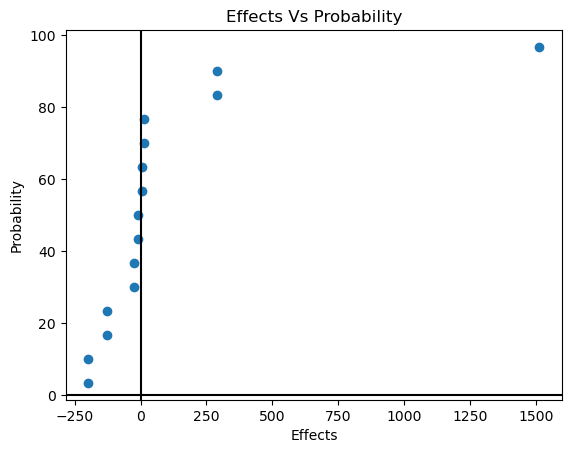

In [15]:
prob_plot([eff_ints[i][1] for i in range(1,len(eff_ints))],label="Effects")